Variance boxplot saved to: final_plots\1000_precision_recall_variance_boxplot.png


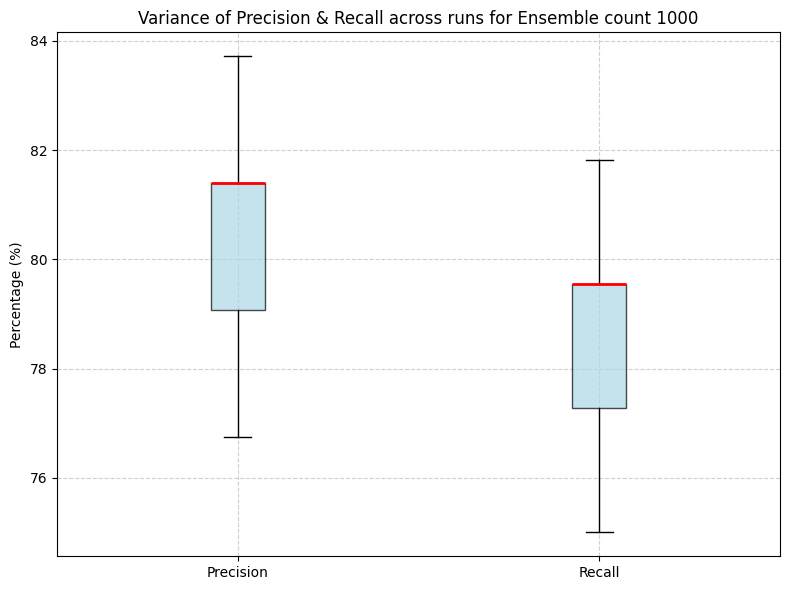

In [30]:
import os
import matplotlib.pyplot as plt

# Folder containing results
folder = 'evaluations/RS_1000'
output_folder = 'final_plots'
os.makedirs(output_folder, exist_ok=True)

def extract_metrics(file_path):
    precision = None
    recall = None
    with open(file_path, 'r') as f:
        for line in f:
            if "Precision" in line:
                precision_str = line.strip().split(":")[-1].replace('%', '').strip()
                precision = float(precision_str)
            elif "Recall" in line:
                recall_str = line.strip().split(":")[-1].replace('%', '').strip()
                recall = float(recall_str)
    return precision, recall


def plot_variance_boxplot():
    txt_files = [f for f in os.listdir(folder) if f.endswith('.txt')]

    precisions = []
    recalls = []

    for filename in txt_files:
        file_path = os.path.join(folder, filename)
        precision, recall = extract_metrics(file_path)
        if precision is not None:
            precisions.append(precision)
        if recall is not None:
            recalls.append(recall)

    # --- Plot distributions ---
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.boxplot([precisions, recalls], labels=["Precision", "Recall"], patch_artist=True,
               boxprops=dict(facecolor="lightblue", alpha=0.7),
               medianprops=dict(color="red", linewidth=2))

    ax.set_title("Variance of Precision & Recall across runs for Ensemble count 1000")
    ax.set_ylabel("Percentage (%)")
    ax.grid(True, linestyle="--", alpha=0.6)

    output_path = os.path.join(output_folder, '1000_precision_recall_variance_boxplot.png')
    plt.tight_layout()
    plt.savefig(output_path)
    print(f"Variance boxplot saved to: {output_path}")
    plt.show()
    plt.close(fig)


# Run
plot_variance_boxplot()



Comparison boxplot saved to: plots\comparison_precision_recall_variance_boxplot.png


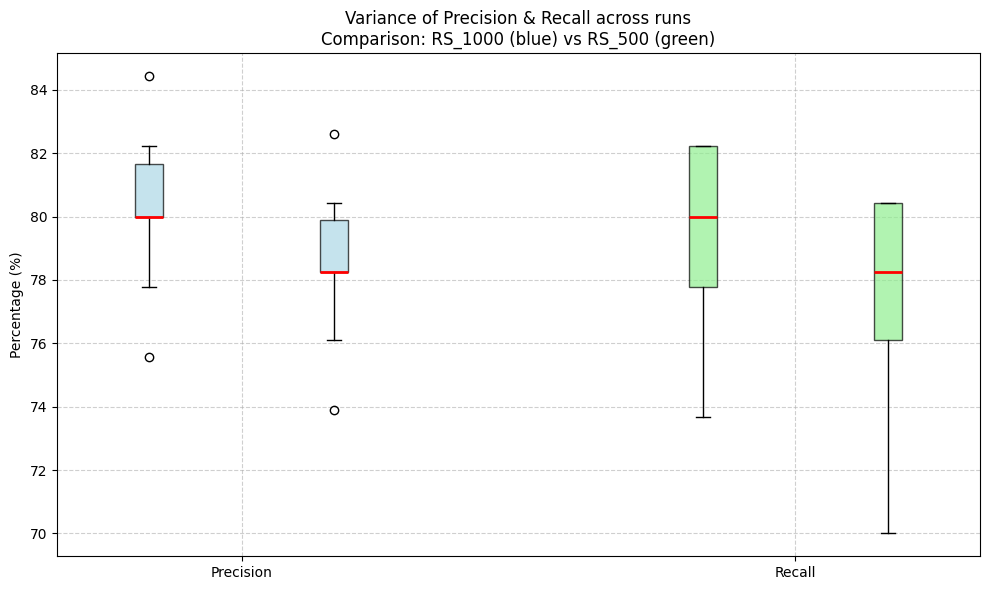

In [16]:
import os
import matplotlib.pyplot as plt

# Two folders to compare
folder1 = 'evaluations/RS_1000'
folder2 = 'evaluations/ogfts'
output_folder = 'plots'
os.makedirs(output_folder, exist_ok=True)

def extract_metrics(file_path):
    precision = None
    recall = None
    with open(file_path, 'r') as f:
        for line in f:
            if "Precision" in line:
                precision_str = line.strip().split(":")[-1].replace('%', '').strip()
                precision = float(precision_str)
            elif "Recall" in line:
                recall_str = line.strip().split(":")[-1].replace('%', '').strip()
                recall = float(recall_str)
    return precision, recall


def gather_metrics(folder):
    txt_files = [f for f in os.listdir(folder) if f.endswith('.txt')]
    precisions, recalls = [], []
    for filename in txt_files:
        file_path = os.path.join(folder, filename)
        precision, recall = extract_metrics(file_path)
        if precision is not None:
            precisions.append(precision)
        if recall is not None:
            recalls.append(recall)
    return precisions, recalls


def plot_variance_boxplot():
    precisions1, recalls1 = gather_metrics(folder1)
    precisions2, recalls2 = gather_metrics(folder2)

    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot grouped boxplots
    boxprops1 = dict(facecolor="lightblue", alpha=0.7)
    boxprops2 = dict(facecolor="lightgreen", alpha=0.7)

    data = [precisions1, recalls1, precisions2, recalls2]
    positions = [1, 2, 4, 5]  # Leave gap between groups

    ax.boxplot(data[:2], positions=positions[:2], patch_artist=True,
               boxprops=boxprops1, medianprops=dict(color="red", linewidth=2))

    ax.boxplot(data[2:], positions=positions[2:], patch_artist=True,
               boxprops=boxprops2, medianprops=dict(color="red", linewidth=2))

    ax.set_xticks([1.5, 4.5])
    ax.set_xticklabels(["Precision", "Recall"])

    ax.set_title("Variance of Precision & Recall across runs\nComparison: RS_1000 (blue) vs RS_500 (green)")
    ax.set_ylabel("Percentage (%)")
    ax.grid(True, linestyle="--", alpha=0.6)

    output_path = os.path.join(output_folder, 'comparison_precision_recall_variance_boxplot.png')
    plt.tight_layout()
    plt.savefig(output_path)
    print(f"Comparison boxplot saved to: {output_path}")
    plt.show()
    plt.close(fig)


# Run
plot_variance_boxplot()


Comparison boxplot saved to: final_plots\ogfts_comparison_precision_recall_variance_boxplot.png


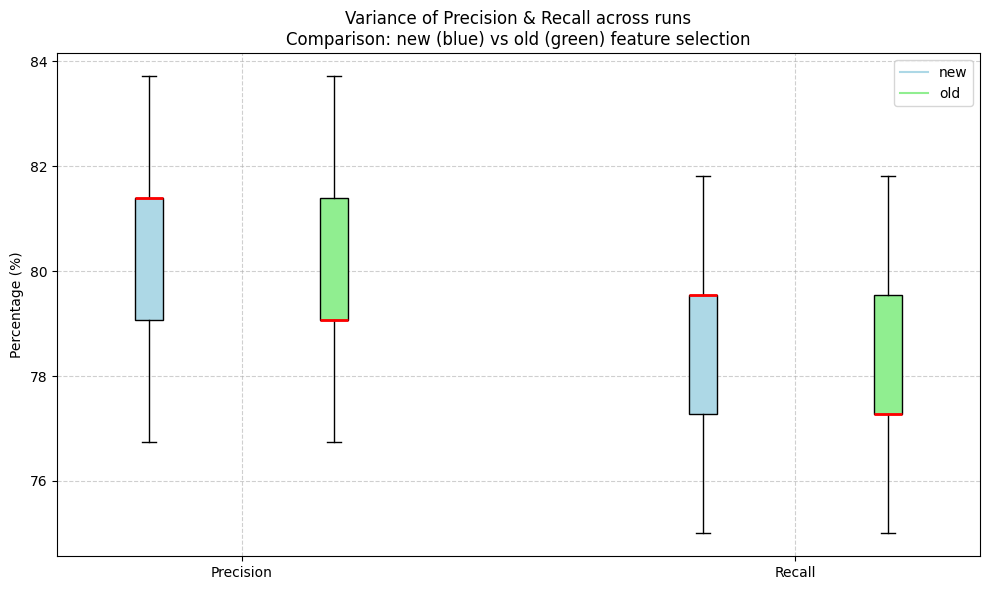

In [37]:
import os
import matplotlib.pyplot as plt

# Two folders to compare
folder1 = 'evaluations/RS_1000'   # RS1000
folder2 = 'evaluations/ogfts'      # OGFTS
output_folder = 'final_plots'
os.makedirs(output_folder, exist_ok=True)

def extract_metrics(file_path):
    precision = None
    recall = None
    with open(file_path, 'r') as f:
        for line in f:
            if "Precision" in line:
                precision_str = line.strip().split(":")[-1].replace('%', '').strip()
                precision = float(precision_str)
            elif "Recall" in line:
                recall_str = line.strip().split(":")[-1].replace('%', '').strip()
                recall = float(recall_str)
    return precision, recall

def gather_metrics(folder):
    txt_files = [f for f in os.listdir(folder) if f.endswith('.txt')]
    precisions, recalls = [], []
    for filename in txt_files:
        file_path = os.path.join(folder, filename)
        precision, recall = extract_metrics(file_path)
        if precision is not None:
            precisions.append(precision)
        if recall is not None:
            recalls.append(recall)
    return precisions, recalls

def plot_variance_boxplot():
    precisions1, recalls1 = gather_metrics(folder1)  # RS1000
    precisions2, recalls2 = gather_metrics(folder2)  # OGFTS

    fig, ax = plt.subplots(figsize=(10, 6))

    # Positions
    positions_precision = [1, 2]
    positions_recall = [4, 5]

    # Data order: RS1000 left, OGFTS right
    bp_prec = ax.boxplot([precisions1, precisions2], positions=positions_precision, patch_artist=True,
                         medianprops=dict(color="red", linewidth=2))
    colors = ['lightblue', 'lightgreen']  # RS1000 blue, OGFTS green
    for patch, color in zip(bp_prec['boxes'], colors):
        patch.set_facecolor(color)

    bp_rec = ax.boxplot([recalls1, recalls2], positions=positions_recall, patch_artist=True,
                        medianprops=dict(color="red", linewidth=2))
    for patch, color in zip(bp_rec['boxes'], colors):
        patch.set_facecolor(color)

    # Set x-ticks
    ax.set_xticks([1.5, 4.5])
    ax.set_xticklabels(["Precision", "Recall"])

    # Add grid and legend
    ax.set_title("Variance of Precision & Recall across runs\nComparison: new (blue) vs old (green) feature selection")
    ax.set_ylabel("Percentage (%)")
    ax.grid(True, linestyle="--", alpha=0.6)

    # Legend
    ax.plot([], c='lightblue', label='new')
    ax.plot([], c='lightgreen', label='old')
    ax.legend()

    # Save & show
    output_path = os.path.join(output_folder, 'ogfts_comparison_precision_recall_variance_boxplot.png')
    plt.tight_layout()
    plt.savefig(output_path)
    print(f"Comparison boxplot saved to: {output_path}")
    plt.show()
    plt.close(fig)

# Run
plot_variance_boxplot()



Comparison boxplot saved to: final_plots\comparison_precision_recall_variance_boxplot.png


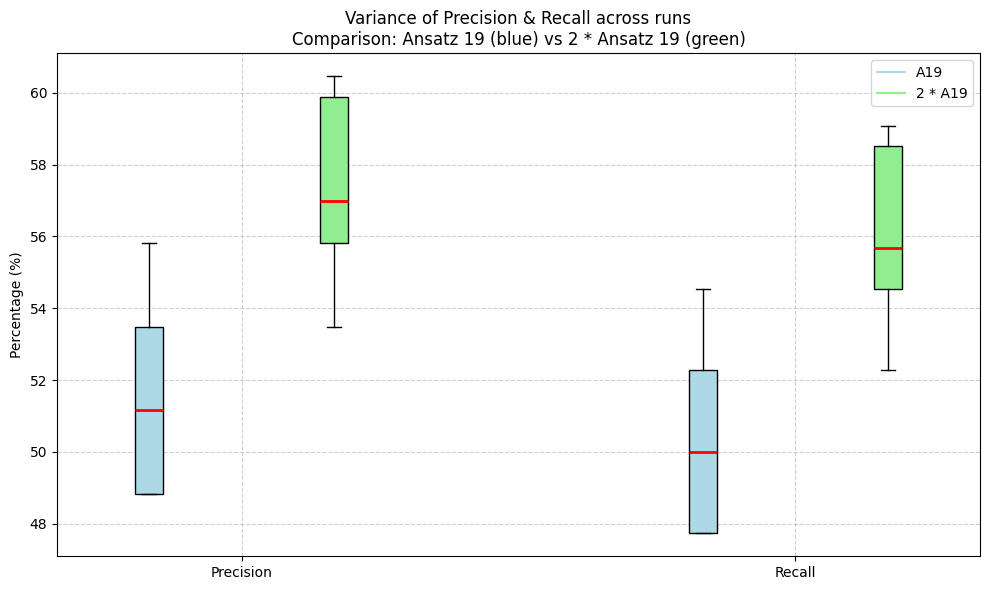

In [36]:
import os
import matplotlib.pyplot as plt

# Two folders to compare
folder1 = 'evaluations/A19'   # RS1000
folder2 = 'evaluations/A19_tt'      # OGFTS
output_folder = 'final_plots'
os.makedirs(output_folder, exist_ok=True)

def extract_metrics(file_path):
    precision = None
    recall = None
    with open(file_path, 'r') as f:
        for line in f:
            if "Precision" in line:
                precision_str = line.strip().split(":")[-1].replace('%', '').strip()
                precision = float(precision_str)
            elif "Recall" in line:
                recall_str = line.strip().split(":")[-1].replace('%', '').strip()
                recall = float(recall_str)
    return precision, recall

def gather_metrics(folder):
    txt_files = [f for f in os.listdir(folder) if f.endswith('.txt')]
    precisions, recalls = [], []
    for filename in txt_files:
        file_path = os.path.join(folder, filename)
        precision, recall = extract_metrics(file_path)
        if precision is not None:
            precisions.append(precision)
        if recall is not None:
            recalls.append(recall)
    return precisions, recalls

def plot_variance_boxplot():
    precisions1, recalls1 = gather_metrics(folder1)  # RS1000
    precisions2, recalls2 = gather_metrics(folder2)  # OGFTS

    fig, ax = plt.subplots(figsize=(10, 6))

    # Positions
    positions_precision = [1, 2]
    positions_recall = [4, 5]

    # Data order: RS1000 left, OGFTS right
    bp_prec = ax.boxplot([precisions1, precisions2], positions=positions_precision, patch_artist=True,
                         medianprops=dict(color="red", linewidth=2))
    colors = ['lightblue', 'lightgreen']  # RS1000 blue, OGFTS green
    for patch, color in zip(bp_prec['boxes'], colors):
        patch.set_facecolor(color)

    bp_rec = ax.boxplot([recalls1, recalls2], positions=positions_recall, patch_artist=True,
                        medianprops=dict(color="red", linewidth=2))
    for patch, color in zip(bp_rec['boxes'], colors):
        patch.set_facecolor(color)

    # Set x-ticks
    ax.set_xticks([1.5, 4.5])
    ax.set_xticklabels(["Precision", "Recall"])

    # Add grid and legend
    ax.set_title("Variance of Precision & Recall across runs\nComparison: Ansatz 19 (blue) vs 2 * Ansatz 19 (green)")
    ax.set_ylabel("Percentage (%)")
    ax.grid(True, linestyle="--", alpha=0.6)

    # Legend
    ax.plot([], c='lightblue', label='A19')
    ax.plot([], c='lightgreen', label='2 * A19')
    ax.legend()

    # Save & show
    output_path = os.path.join(output_folder, 'comparison_precision_recall_variance_boxplot.png')
    plt.tight_layout()
    plt.savefig(output_path)
    print(f"Comparison boxplot saved to: {output_path}")
    plt.show()
    plt.close(fig)

# Run
plot_variance_boxplot()
